In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


### Loading in the Data frame

In [15]:
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 3/Naive_Bayes/Naive_Bayes_Data.csv')
#drop tournament column
df = df.drop(columns=['tournament'])
df.head()

,rank_category,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,2,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch
1,2,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me
2,2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet
3,2,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick
4,2,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind


# Selecting the Target and Feature Variables. Encoding the categorical features

In [16]:
# Select features and target variable
features = ['pokemon', 'item', 'ability', 'tera type', 'move_1', 'move_2', 'move_3', 'move_4']
target = 'rank_category'

features = df[features]
target = df[target]

# Encode the categorical features
features = features.apply(LabelEncoder().fit_transform)
features

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4
0,80,16,48,4,44,38,32,198
1,84,41,68,6,157,103,226,62
2,130,38,137,18,31,188,26,6
3,58,3,91,0,39,216,56,102
4,135,22,82,1,110,52,114,178
...,...,...,...,...,...,...,...,...
4447,124,38,82,8,10,99,198,131
4448,130,12,137,1,192,25,193,196
4449,117,49,17,16,38,38,129,131
4450,25,80,134,9,190,127,46,131


In [17]:
# Define X (features) and y (target)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

### SVM with Linear Kernal

#### With C Value = 0.1

In [56]:
linear_svm = svm.SVC(kernel = 'linear', C = 0.1)
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5791245791245792
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.58      1.00      0.73       516
           2       0.00      0.00      0.00       153

    accuracy                           0.58       891
   macro avg       0.19      0.33      0.24       891
weighted avg       0.34      0.58      0.42       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 222,   0],
       [  0, 516,   0],
       [  0, 153,   0]], dtype=int64)

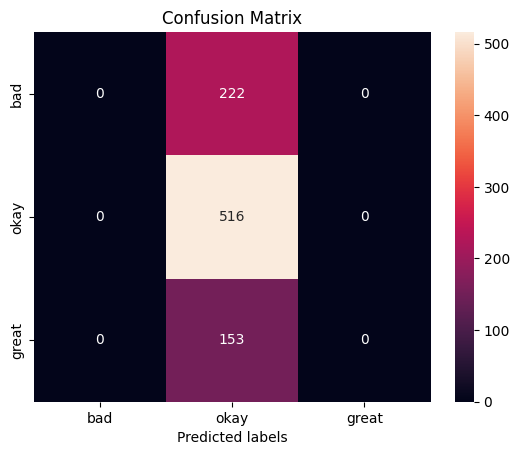

In [19]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Linear_.1.png')
plt.show()

#### With a C value = 1

In [20]:
linear_svm = svm.SVC(kernel = 'linear', C = 1)
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5791245791245792
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.58      1.00      0.73       516
           2       0.00      0.00      0.00       153

    accuracy                           0.58       891
   macro avg       0.19      0.33      0.24       891
weighted avg       0.34      0.58      0.42       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 222,   0],
       [  0, 516,   0],
       [  0, 153,   0]], dtype=int64)

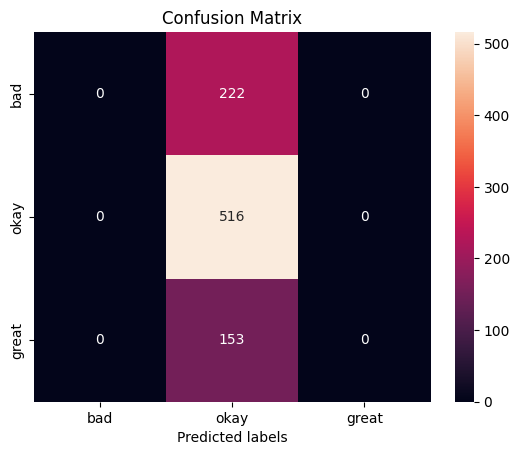

In [21]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Linear_1.png')
plt.show()

#### With a C Value = 10

In [22]:
linear_svm = svm.SVC(kernel = 'linear', C = 10)
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5791245791245792
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.58      1.00      0.73       516
           2       0.00      0.00      0.00       153

    accuracy                           0.58       891
   macro avg       0.19      0.33      0.24       891
weighted avg       0.34      0.58      0.42       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 222,   0],
       [  0, 516,   0],
       [  0, 153,   0]], dtype=int64)

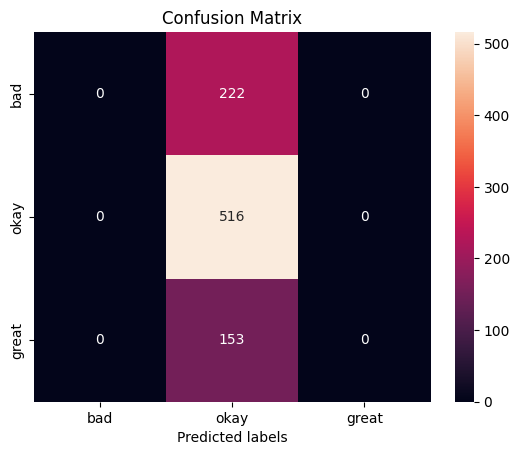

In [23]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Linear_10.png')
plt.show()

### SVM with Sigmoid Kernal

#### C = 0.1

In [59]:
RBF_svm = svm.SVC(kernel = 'sigmoid', C = 0.1)
RBF_svm.fit(X_train, y_train)

y_pred = RBF_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5286195286195287
              precision    recall  f1-score   support

           0       0.28      0.18      0.22       222
           1       0.58      0.83      0.68       516
           2       0.00      0.00      0.00       153

    accuracy                           0.53       891
   macro avg       0.29      0.34      0.30       891
weighted avg       0.40      0.53      0.45       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[ 41, 181,   0],
       [ 86, 430,   0],
       [ 18, 135,   0]], dtype=int64)

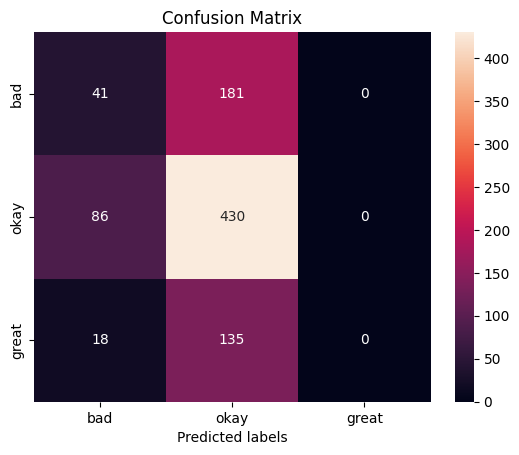

In [31]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Sigmoid_.1.png')
plt.show()

#### C = 1

In [32]:
RBF_svm = svm.SVC(kernel = 'sigmoid', C = 1)
RBF_svm.fit(X_train, y_train)

y_pred = RBF_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.40852974186307517
              precision    recall  f1-score   support

           0       0.25      0.49      0.33       222
           1       0.55      0.49      0.52       516
           2       0.00      0.00      0.00       153

    accuracy                           0.41       891
   macro avg       0.27      0.33      0.29       891
weighted avg       0.38      0.41      0.39       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[109, 113,   0],
       [261, 255,   0],
       [ 59,  94,   0]], dtype=int64)

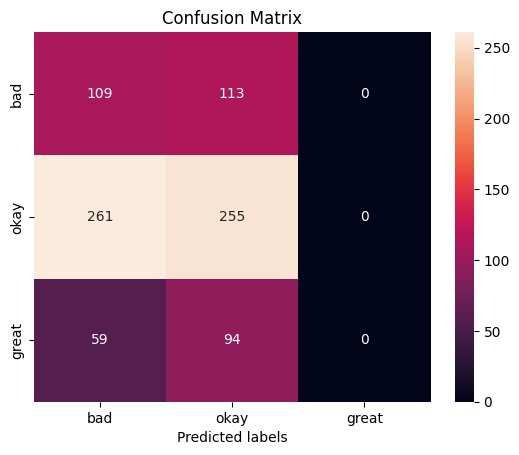

In [33]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Sigmoid_1.png')
plt.show()

In [40]:
RBF_svm = svm.SVC(kernel = 'sigmoid', C = 10)
RBF_svm.fit(X_train, y_train)

y_pred = RBF_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.40179573512906847
              precision    recall  f1-score   support

           0       0.25      0.51      0.34       222
           1       0.55      0.47      0.51       516
           2       0.00      0.00      0.00       153

    accuracy                           0.40       891
   macro avg       0.27      0.33      0.28       891
weighted avg       0.38      0.40      0.38       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[114, 108,   0],
       [272, 244,   0],
       [ 62,  91,   0]], dtype=int64)

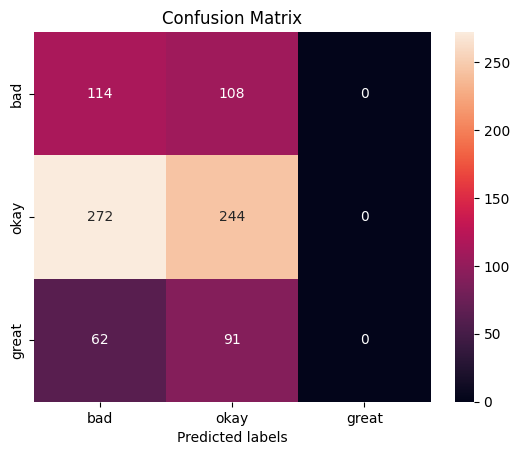

In [41]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Sigmoid_10.png')
plt.show()

### SVM with Polynomial  Kernal

#### C = .1

In [49]:
Poly_svm = svm.SVC(kernel = 'poly', C = .1)
Poly_svm.fit(X_train, y_train)

y_pred = Poly_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5791245791245792
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.58      1.00      0.73       516
           2       0.00      0.00      0.00       153

    accuracy                           0.58       891
   macro avg       0.19      0.33      0.24       891
weighted avg       0.34      0.58      0.42       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 222,   0],
       [  0, 516,   0],
       [  0, 153,   0]], dtype=int64)

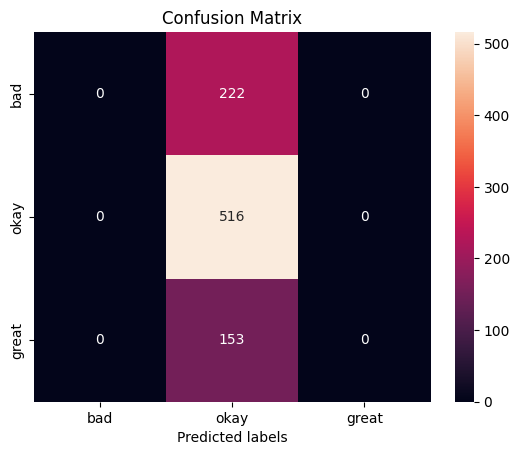

In [50]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Poly_.1.png')
plt.show()

#### C = 1

In [51]:
Poly_svm = svm.SVC(kernel = 'poly', C = 1)
Poly_svm.fit(X_train, y_train)

y_pred = Poly_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5791245791245792
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.58      1.00      0.73       516
           2       0.00      0.00      0.00       153

    accuracy                           0.58       891
   macro avg       0.19      0.33      0.24       891
weighted avg       0.34      0.58      0.42       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 222,   0],
       [  0, 516,   0],
       [  0, 153,   0]], dtype=int64)

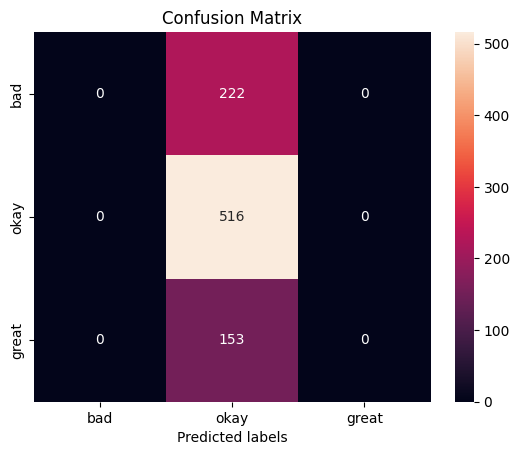

In [52]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Poly_1.png')
plt.show()

#### C = 10

In [53]:
Poly_svm = svm.SVC(kernel = 'poly', C = 10)
Poly_svm.fit(X_train, y_train)

y_pred = Poly_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)
# create a confusion matrix

confusion_matrix(y_test, y_pred)

0.5791245791245792
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       222
           1       0.58      1.00      0.73       516
           2       0.00      0.00      0.00       153

    accuracy                           0.58       891
   macro avg       0.19      0.33      0.24       891
weighted avg       0.34      0.58      0.42       891



C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryhen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

array([[  0, 222,   0],
       [  0, 516,   0],
       [  0, 153,   0]], dtype=int64)

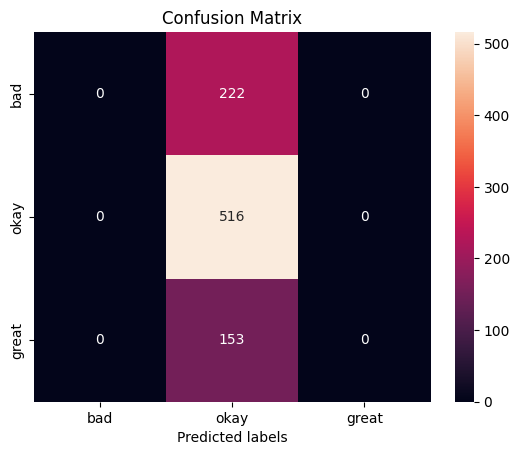

In [54]:
#make the confusion matrix into a graph
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['bad', 'okay', 'great']); ax.yaxis.set_ticklabels(['bad', 'okay', 'great'])

#save the graph
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 4/Screenshots/SVM_Poly_10.png')
plt.show()